In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.base.datetools import dates_from_str
import matplotlib.pyplot as plt

In [37]:
forex = pd.read_excel('forex.xlsx', index_col=0)
forex.tail()

,Robusta,BRL,IDR,WTI
Date,,,,
2018-01-11,160.828142,175.035384,187.896213,256.122039
2018-01-12,161.670942,174.540011,187.237027,258.129265
2018-01-16,160.956394,175.514426,187.054698,255.841028
2018-01-17,164.510810,175.487207,187.307153,256.804496
2018-01-18,164.510810,174.654328,187.166900,256.884785


In [15]:
model = VAR(forex)

In [16]:
results = model.fit(2)

In [17]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Jan, 2018
Time:                     14:16:30
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    5.87791
Nobs:                     4653.00    HQIC:                   5.84559
Log likelihood:          -39932.2    FPE:                    339.694
AIC:                      5.82804    Det(Omega_mle):         337.078
--------------------------------------------------------------------
Results for equation Robusta
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.466862         0.286247           -1.631           0.103
L1.Robusta         0.924839         0.014617           63.272           0.000
L1.BRL            -0.114672         0.022967           -4.993         

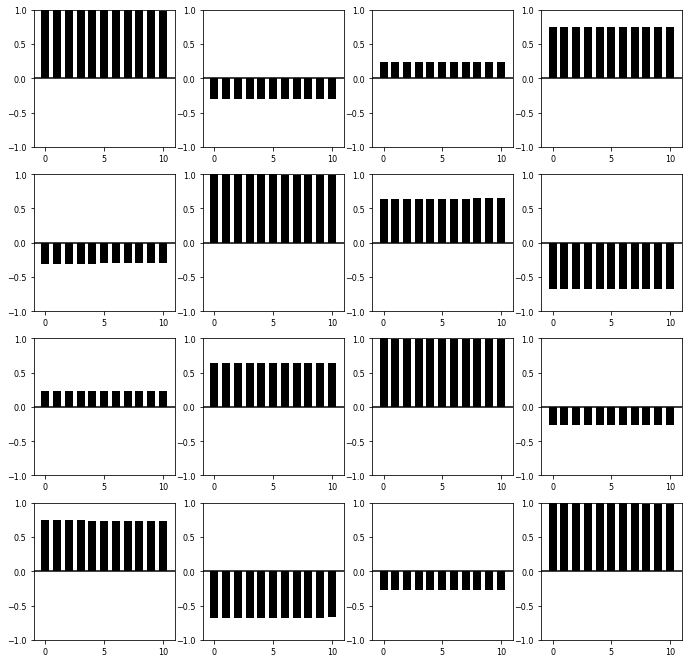

In [23]:
results.plot_acorr()
plt.show()

In [24]:
model.select_order(15)

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0         28.23        28.23    1.811e+12        28.23
1         5.875        5.903        356.1        5.885
2         5.832       5.882*        341.2       5.850*
3         5.826        5.898        339.1        5.852
4        5.823*        5.918       338.1*        5.856
5         5.824        5.941        338.4        5.865
6         5.825        5.964        338.8        5.874
7         5.827        5.988        339.3        5.884
8         5.830        6.013        340.3        5.894
9         5.831        6.037        340.7        5.903
10        5.832        6.060        341.0        5.912
11        5.834        6.084        341.8        5.922
12        5.837        6.109        342.8        5.933
13        5.836        6.130        342.4        5.940
14        5.841        6.158        344.1        5.952
15        

{'aic': 4, 'bic': 2, 'fpe': 4, 'hqic': 2}

In [25]:
results = model.fit(maxlags=15, ic='aic')

In [101]:
results.k_ar

4

In [26]:
lag_order = results.k_ar

In [28]:
results.forecast(forex.values[-lag_order:], 5)

array([[ 164.59792348,  174.65401289,  187.11841678,  256.35708815],
       [ 164.58262115,  174.6784978 ,  187.09577923,  256.06614298],
       [ 164.66875566,  174.67083826,  187.03806022,  255.771723  ],
       [ 164.74287697,  174.67448623,  187.01245578,  255.51004459],
       [ 164.81284268,  174.67834523,  186.99467443,  255.24686659]])

In [43]:
forecasted = results.forecast(forex.values[-lag_order:], 10)
forecasted

array([[ 164.59792348,  174.65401289,  187.11841678,  256.35708815],
       [ 164.58262115,  174.6784978 ,  187.09577923,  256.06614298],
       [ 164.66875566,  174.67083826,  187.03806022,  255.771723  ],
       [ 164.74287697,  174.67448623,  187.01245578,  255.51004459],
       [ 164.81284268,  174.67834523,  186.99467443,  255.24686659],
       [ 164.87986664,  174.68129297,  186.97350618,  254.97745666],
       [ 164.94588974,  174.685217  ,  186.95345376,  254.71089002],
       [ 165.01089576,  174.6891305 ,  186.9340018 ,  254.44703462],
       [ 165.075226  ,  174.69305786,  186.91451289,  254.18463156],
       [ 165.13871673,  174.69707739,  186.89519927,  253.92402877]])

In [55]:
forerobus = forecasted[0]
forerobus[0]

164.58262115307974

In [76]:
f_robus = []
for i in np.arange(len(forecasted)):
    forerobus = forecasted[i]
#    print(forerobus)
    f_robus.append(forerobus[0])
#    print(f_robus)
#    for j in np.arange(len(forerobus)):
#        print(forerobus[j])
print(f_robus)

[164.5979234809154, 164.58262115307974, 164.66875566473706, 164.74287697101846, 164.81284268327434, 164.87986663768888, 164.94588974329679, 165.01089576394247, 165.07522600026135, 165.13871673042038]


In [81]:
f_robus = pd.DataFrame(f_robus)

In [82]:
writer = pd.ExcelWriter('proto_1.xlsx')
f_robus.to_excel(writer,'Sheet1')
writer.save()

In [95]:
to_plot=pd.read_excel('forecasted.xlsx', index_col=0)

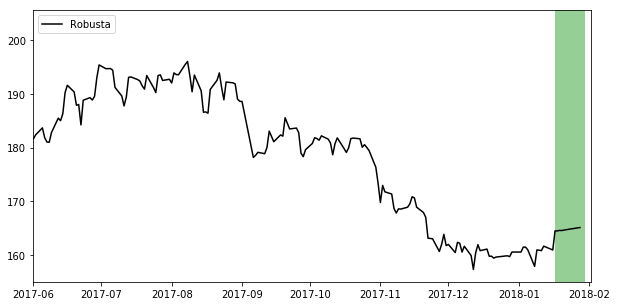

In [100]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(to_plot['Forecasted'], 'k', label='Robusta')
plt.axvspan('2018-01-17','2018-01-30', facecolor='#2ca02c', alpha=0.5)
ax.set_xlim(['06/01/2017', '02/02/2018'])
ax.legend(loc='best')
plt.show()

In [7]:
forex = pd.read_excel('forex.xlsx', index_col=0)
forex.tail()

,Robusta,BRL,IDR,WTI,Events
Date,,,,,
2018-01-11,160.828142,175.035384,187.896213,256.122039,1
2018-01-12,161.670942,174.540011,187.237027,258.129265,1
2018-01-16,160.956394,175.514426,187.054698,255.841028,1
2018-01-17,164.510810,175.487207,187.307153,256.804496,1
2018-01-18,164.510810,174.654328,187.166900,256.884785,1


In [8]:
model = VAR(forex)
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Jan, 2018
Time:                     18:05:38
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                  -0.107555
Nobs:                     4509.00    HQIC:                 -0.158226
Log likelihood:          -31516.1    FPE:                   0.830448
AIC:                    -0.185790    Det(Omega_mle):        0.820392
--------------------------------------------------------------------
Results for equation Robusta
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.414831         0.292322           -1.419           0.156
L1.Robusta         0.917398         0.014875           61.673           0.000
L1.BRL            -0.116851         0.023076           -5.064         

In [9]:
model.select_order(15)

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0         26.42        26.43    2.986e+11        26.42
1       -0.1353     -0.09248       0.8735      -0.1202
2       -0.1783    -0.09992*       0.8367     -0.1507*
3      -0.1821*     -0.06799      0.8336*      -0.1419
4       -0.1816     -0.03187       0.8339      -0.1288
5       -0.1781     0.007291       0.8369      -0.1128
6       -0.1735      0.04751       0.8407     -0.09562
7       -0.1699      0.08675       0.8437     -0.07948
8       -0.1630       0.1293       0.8496     -0.05999
9       -0.1580       0.1700       0.8539     -0.04239
10      -0.1545       0.2091       0.8568     -0.02639
11      -0.1493       0.2500       0.8613    -0.008580
12      -0.1430       0.2919       0.8668      0.01029
13      -0.1434       0.3272       0.8665      0.02246
14      -0.1349       0.3713       0.8739      0.04352
15      -0

{'aic': 3, 'bic': 2, 'fpe': 3, 'hqic': 2}

In [10]:
results = model.fit(maxlags=15, ic='aic')
lag_order = results.k_ar
forecasted = results.forecast(forex.values[-lag_order:], 10)
forecasted

array([[ 164.57955016,  174.60626767,  187.10635442,  256.48990237,
           0.99757596],
       [ 164.68025392,  174.65794859,  187.111648  ,  256.35795755,
           0.99328525],
       [ 164.74364525,  174.63756462,  187.12213717,  256.20631702,
           0.98905827],
       [ 164.81266966,  174.61382443,  187.12605863,  256.04062934,
           0.98495197],
       [ 164.88444918,  174.5983158 ,  187.1292983 ,  255.87875464,
           0.98085244],
       [ 164.95434818,  174.58258734,  187.13317225,  255.71774591,
           0.97677404],
       [ 165.02333022,  174.56628927,  187.13698683,  255.55697916,
           0.97272447],
       [ 165.0917986 ,  174.55039417,  187.14065674,  255.39674952,
           0.9687012 ],
       [ 165.15959971,  174.53483175,  187.14426716,  255.23704588,
           0.96470357],
       [ 165.22671177,  174.51949921,  187.14781924,  255.07784059,
           0.96073174]])